Project 1- Image classification


Name-Arunkumar Ramachandran


Student ID-903928488

In [ ]:
#############################################################################################################################################################

#Importing all the necessary packages.

import numpy as np
import matplotlib.pyplot as plot
from random import randint
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn import datasets
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import normalize
import time
import os
import cv2
import pandas as pd
from sklearn import preprocessing
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import glob
from google.colab import auth
from sklearn.utils import shuffle
from oauth2client.client import GoogleCredentials

The Dataset is loaded from google drive

In [ ]:

# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Dataset"


Mounted at /content/drive
seg_pred  seg_test  seg_train


The test set data is loaded

In [ ]:
def get_images():
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0

    
    for labels in os.listdir(r"/content/drive/My Drive/Dataset/seg_test/seg_test/"): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
    
        for image_file in os.listdir("/content/drive/My Drive/Dataset/seg_test/seg_test/"+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread("/content/drive/My Drive/Dataset/seg_test/seg_test/"+labels+r'/'+image_file) #Reading the image (OpenCV)
            print("/content/drive/My Drive/Dataset/seg_test/seg_test/"+labels+r'/'+image_file)
            image = cv2.resize(image,(50,50)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=1) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

Images,Labels = get_images()

/content/drive/My Drive/Dataset/seg_test/seg_test/glacier/20142.jpg
/content/drive/My Drive/Dataset/seg_test/seg_test/glacier/20087.jpg
/content/drive/My Drive/Dataset/seg_test/seg_test/glacier/20164.jpg
/content/drive/My Drive/Dataset/seg_test/seg_test/glacier/20109.jpg
/content/drive/My Drive/Dataset/seg_test/seg_test/glacier/20111.jpg
/content/drive/My Drive/Dataset/seg_test/seg_test/glacier/20092.jpg
/content/drive/My Drive/Dataset/seg_test/seg_test/glacier/20059.jpg
/content/drive/My Drive/Dataset/seg_test/seg_test/glacier/20362.jpg
/content/drive/My Drive/Dataset/seg_test/seg_test/glacier/20386.jpg
/content/drive/My Drive/Dataset/seg_test/seg_test/glacier/20446.jpg
/content/drive/My Drive/Dataset/seg_test/seg_test/glacier/20383.jpg
/content/drive/My Drive/Dataset/seg_test/seg_test/glacier/20355.jpg
/content/drive/My Drive/Dataset/seg_test/seg_test/glacier/20198.jpg
/content/drive/My Drive/Dataset/seg_test/seg_test/glacier/20373.jpg
/content/drive/My Drive/Dataset/seg_test/seg_tes

In [ ]:
Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)
print("Shape of Images_Test:",Images.shape)
print("Shape of Labels_Test:",Labels.shape)

Shape of Images_Test: (3000, 50, 50, 3)
Shape of Labels_Test: (3000,)


The images in test set are then plotted. On plotting, we can see that there is a variation in colors because the images are in BGR.

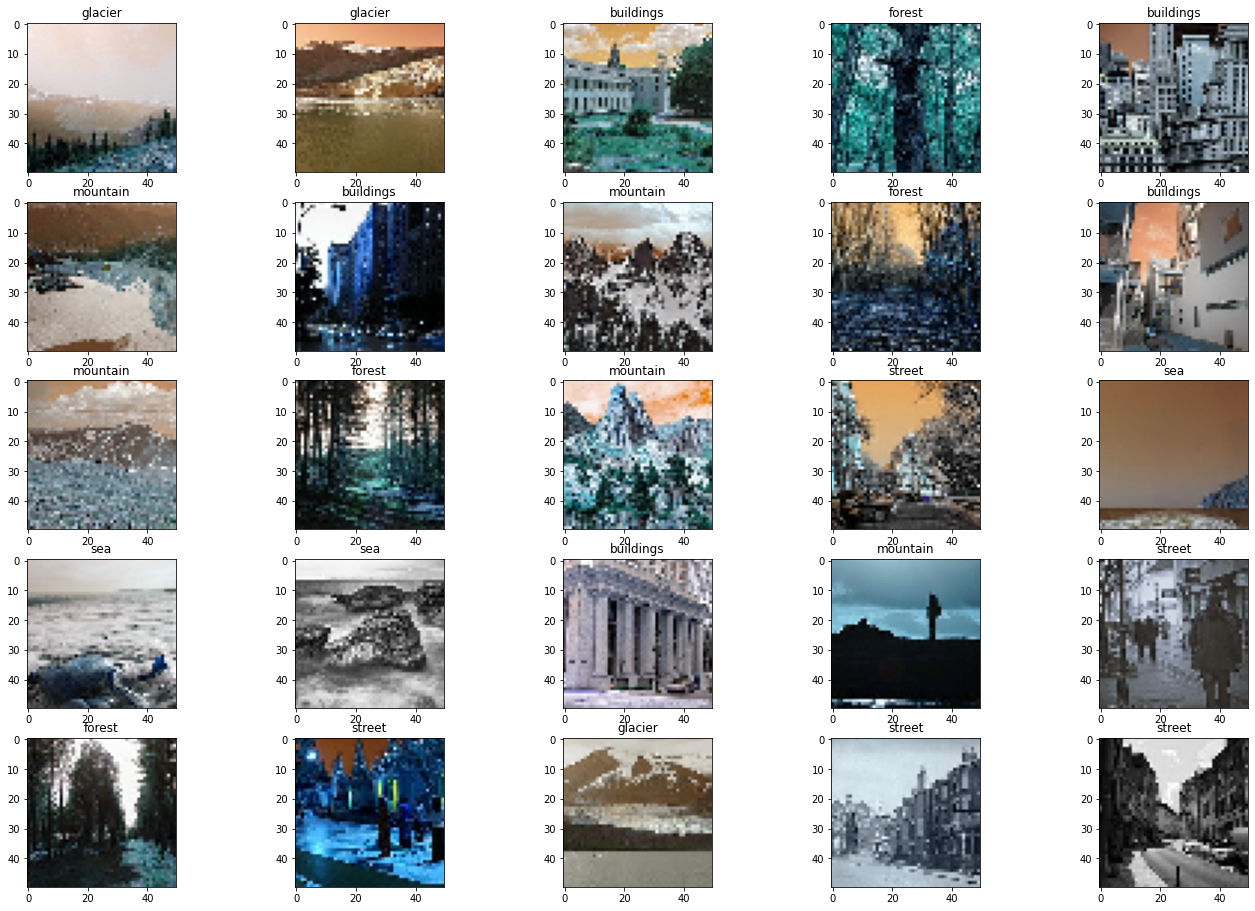

In [ ]:
h,ax = plot.subplots(5,5) 
h.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))  

One of the BGR image is converted and then plotted.

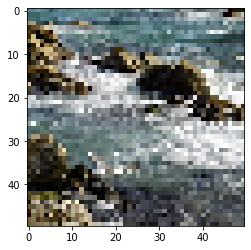

In [ ]:
height=50
width=50
scaled_picture = cv2.cvtColor(cv2.resize(Images[1],(height,width)),cv2.COLOR_BGR2RGB)
plt.imshow(scaled_picture)
plt.show()

The train data set is loaded.

In [ ]:
def get_im():
    Img = []
    Lab = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    labels = 0


    
    for lab in os.listdir(r"/content/drive/My Drive/Dataset/seg_train/seg_train/"): #Main Directory where each class label is present as folder name.
        if lab == 'glacier': #Folder contain Glacier Images get the '2' class label.
            labels = 2
        elif lab == 'sea':
            labels = 4
        elif lab == 'buildings':
            labels = 0
        elif lab == 'forest':
            labels = 1
        elif lab == 'street':
            labels = 5
        elif lab == 'mountain':
            labels = 3
    
        for image_file in os.listdir("/content/drive/My Drive/Dataset/seg_train/seg_train/"+lab): #Extracting the file name of the image from Class Label folder
            im = cv2.imread("/content/drive/My Drive/Dataset/seg_train/seg_train/"+lab+r'/'+image_file) #Reading the image (OpenCV)
            print("/content/drive/My Drive/Dataset/seg_train/seg_train/"+lab+r'/'+image_file)
            im = cv2.resize(im,(50,50)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Img.append(im)
            Lab.append(labels)
    
    return shuffle(Img,Lab,random_state=1) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    lab = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return lab[class_code]

Img,Lab = get_im()

Streaming output truncated to the last 5000 lines.
/content/drive/My Drive/Dataset/seg_train/seg_train/glacier/19441.jpg
/content/drive/My Drive/Dataset/seg_train/seg_train/glacier/196.jpg
/content/drive/My Drive/Dataset/seg_train/seg_train/glacier/19507.jpg
/content/drive/My Drive/Dataset/seg_train/seg_train/glacier/19579.jpg
/content/drive/My Drive/Dataset/seg_train/seg_train/glacier/19545.jpg
/content/drive/My Drive/Dataset/seg_train/seg_train/glacier/1947.jpg
/content/drive/My Drive/Dataset/seg_train/seg_train/glacier/19502.jpg
/content/drive/My Drive/Dataset/seg_train/seg_train/glacier/19522.jpg
/content/drive/My Drive/Dataset/seg_train/seg_train/glacier/19443.jpg
/content/drive/My Drive/Dataset/seg_train/seg_train/glacier/19580.jpg
/content/drive/My Drive/Dataset/seg_train/seg_train/glacier/19615.jpg
/content/drive/My Drive/Dataset/seg_train/seg_train/glacier/19565.jpg
/content/drive/My Drive/Dataset/seg_train/seg_train/glacier/19683.jpg
/content/drive/My Drive/Dataset/seg_train/

In [ ]:
Img = np.array(Img) #converting the list of images to numpy array.
Lab = np.array(Lab)
print("Shape of Images_Train:",Img.shape)
print("Shape of Labels_Train:",Lab.shape)

Shape of Images_Train: (14034, 50, 50, 3)
Shape of Labels_Train: (14034,)


The train set data is then plotted.

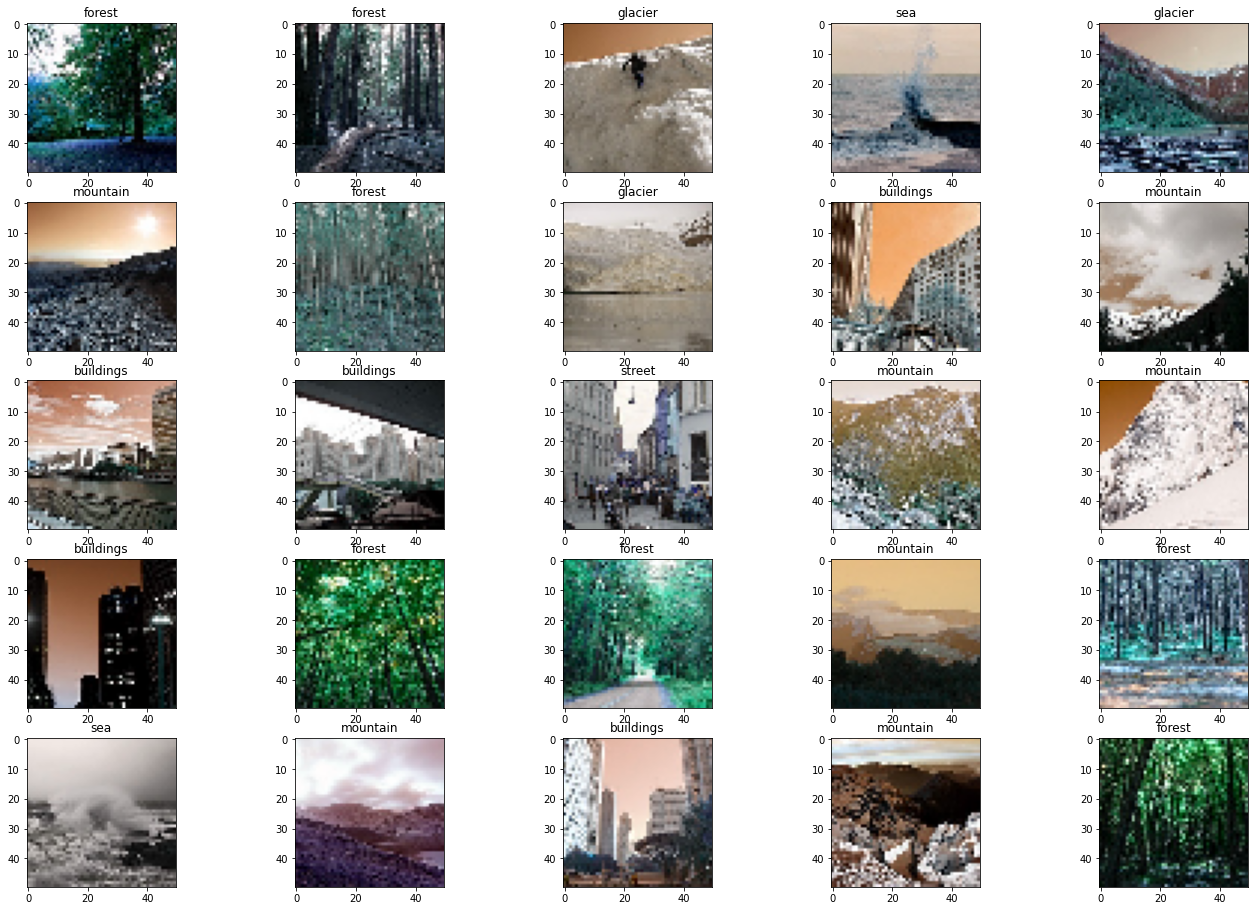

In [ ]:
g,ax = plot.subplots(5,5) 
g.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Img))
        ax[i,j].imshow(Img[rnd_number])
        ax[i,j].set_title(get_classlabel(Lab[rnd_number])) 

Converting one of the images from BGR to RGB

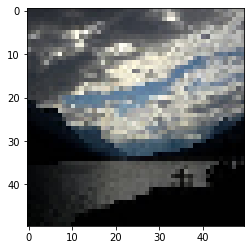

In [ ]:
height=50
width=50

scaled_picture = cv2.cvtColor(cv2.resize(Img[0],(height,width)),cv2.COLOR_BGR2RGB)

plt.imshow(scaled_picture)
plt.show()

In [ ]:
class FeedforwardNeuralNetworkSGD:
    
    def __init__(self, layers, alpha = 0.1, annealing = 'none', lambda1 = 0.1, lambda2 = 0.1, batchSize = 32, gamma = 0.9,
                 initialization = 'normal', activations = 'sigmoid', loss = 'sum-of-squares'):
        # list of weight matrices between layers
        self.W = []
        
        # network architecture will be a vector of numbers of nodes for each layer
        self.layers = layers
        
        self.annealing = annealing
        # learning rate
        self.alpha = alpha
        
        # L1 penalty coefficient
        self.lambda1 = lambda1
        
        # L2 penalty coefficient
        self.lambda2 = lambda2
        
        # batch size
        self.batchSize = batchSize
        
        # momentum parameter
        self.gamma = gamma
        
        # activation type
        self.activation = activations
        
        # loss function
        self.loss = loss
 ##############################################################################################################################
# Try using the weight initialization       
       
        if initialization[0] == 'normal':
            for i in np.arange(0, len(layers) - 2):
                self.W.append(np.random.normal(0.0, 1.0, size=(layers[i] + 1, layers[i + 1] + 1))/initialization[1])

            # initialize weights between the last two layers (we don't want bias for the last one)
            self.W.append(np.random.normal(0.0, 1.0, size=(layers[-2] + 1, layers[-1]))/initialization[1])
            
        if initialization[0] == 'uniform':
            # initialize the weights between layers (up to the next-to-last one) as normal random variables
            for i in np.arange(0, len(layers) - 2):
                self.W.append(np.random.uniform(initialization[1], initialization[2], size=(layers[i] + 1, layers[i + 1] + 1)))

            # initialize weights between the last two layers (we don't want bias for the last one)
            self.W.append(np.random.uniform(initialization[1], initialization[2], size=(layers[-2] + 1, layers[-1])))
            
        if initialization == 'Nielsen':
            # initialize the weights between layers (up to the next-to-last one) as normal random variables
            for i in np.arange(0, len(layers) - 2):
                self.W.append(np.random.normal(0.0, 1.0, size=(layers[i] + 1, layers[i + 1] + 1))/layers[i+1])

            # initialize weights between the last two layers (we don't want bias for the last one)
            self.W.append(np.random.normal(0.0, 1.0, size=(layers[-2] + 1, layers[-1]))/layers[-1])
            
        # LeCun, Glorot, and He initialization
        if initialization[0] in ['LeCun', 'Glorot', 'He']:
            # initialize the weights between layers (up to the next-to-last one) as normal random variables
            for i in np.arange(0, len(layers) - 2):
                
                # define the limit term for normal random variables
                
                # LeCun initialization ("efficient backprop", default initialization in PyTorch)
                if initialization[0] == 'LeCun':
                    limit = np.sqrt(1.0 / layers[i+1])
                    
                # Glorot initialization (default initialization in Keras)
                elif initialization[0] == 'Glorot':
                    mean = (layers[i] + layers[i+1])/2.0
                    limit = np.sqrt(1.0 / mean)
                    
                # He initialization (typically used for very deep nets with PReLU activation)
                elif initialization[0] == 'He':
                    limit = np.sqrt(2.0 / layers[i+1])
                
                # generate the weights
                if initialization[1] == 'normal':
                    self.W.append(np.random.normal(0.0, limit, size=(layers[i] + 1, layers[i + 1] + 1)))
                    
                elif initialization[1] == 'uniform':
                    limit *= np.sqrt(3.0)
                    self.W.append(np.random.uniform(-limit, limit, size=(layers[i] + 1, layers[i + 1] + 1)))

            # initialize weights between the last two layers (we don't want bias for the last one)

            # define the limit term for normal random variables
            if initialization[0] == 'LeCun':
                limit = np.sqrt(1.0 / layers[-2])
                
            elif initialization[0] == 'Glorot':
                mean = (layers[-2] + layers[-1])/2.0
                limit = np.sqrt(1.0 / mean)
                    
            elif initialization[0] == 'He':
                limit = np.sqrt(2.0 / layers[-2])
            
            # initialize the weights
            if initialization[1] == 'normal':
                self.W.append(np.random.normal(0.0, limit, size=(layers[-2] + 1, layers[-1])))
                
            elif initialization[1] == 'uniform':
                limit *= np.sqrt(3.0)
                self.W.append(np.random.uniform(-limit, limit, size=(layers[-2] + 1, layers[-1])))
##############################################################################################################################           
# define the activation function
    def activate(self, x):
        if self.activation == 'sigmoid':
            return 1.0 / (1 + np.exp(-x))

        if self.activation == 'ReLU':
            return x*(x >= 0)
        
        if self.activation == 'ELU':
            return x*(x >= 0) + 0.1*(np.exp(x) - 1)*(x < 0)
    
    # define the activation derivative (where x is the INPUT to activation function)
    def activationDerivative(self, x):
        if self.activation == 'sigmoid':
            return self.activate(x) * (1 - self.activate(x))
        
        if self.activation == 'ReLU':
            return x >= 0
        
        if self.activation == 'ELU':
            return 1*(x >= 0) + 0.1*np.exp(x)*(x < 0)
    
    def getNextBatch(self, X, y, batchSize):
        for i in np.arange(0, X.shape[0], batchSize):
            yield (X[i:i + batchSize], y[i:i + batchSize])
    
    # fit the model
    def fit(self, X, y, testX, testY, epochs = 10000, update = 1000, printPerformance = True):
        # add a column of ones to the end of X
        X = np.hstack((X, np.ones([X.shape[0],1])))
        losses = []
        trainAccuracies = []
        testAccuracies = []
        trainY = y
        
        numberOfExamples = X.shape[0]
        
        # use one-hot encoding for the training labels
        y = LabelBinarizer().fit_transform(y)
        
        v = []
        for layer in np.arange(0,len(self.W)):
            v.append(np.zeros(self.W[layer].shape))
        alpha = self.alpha

        for epoch in np.arange(0,epochs):
            if self.annealing[0] == 'step':
                stepSize = self.alpha/self.annealing[1]
                if epochs > 0 and epoch % self.annealing[1] == 0:
                    alpha -= stepSize
                    print(alpha)
                
            elif self.annealing[0] == 'exp':
                alpha = self.alpha * np.exp(-self.annealing[1] * epoch)
                    
            elif self.annealing[0] == 'inv':
                alpha = self.alpha / (1 + self.annealing[1] * epoch)
            
            
            # randomize the examples
            p = np.arange(0,X.shape[0])
            np.random.shuffle(p)
            X = X[p]
            y = y[p]

            # feed forward, backprop, and weight update
            for (x, target) in self.getNextBatch(X, y, self.batchSize):
                # make a list of output activations from the first layer
                # (just the original x values)
                A = [np.atleast_2d(x)]
                Z = [np.atleast_2d(x)]
                
                # feed forward
                for layer in np.arange(0, len(self.W)):
                    
                    # feed through one layer and apply sigmoid activation
                    net = A[layer].dot(self.W[layer])
                    out = self.activate(net)
                    
                    # add our network output to the list of activations
                    A.append(out)
                    Z.append(net)
                    
                # backpropagation (coming soon!)
                error = A[-1] - target
                
                if self.loss == 'sum-of-squares':
                    D = [error * self.activationDerivative(Z[-1])]
                    
                if self.loss == 'cross-entropy':
                    D = [error]
                
                # loop backwards over the layers to build up deltas
                for layer in np.arange(len(A) - 2, 0, -1):
                    delta = D[-1].dot(self.W[layer].T)
                    delta = delta * self.activationDerivative(Z[layer])
                    D.append(delta)
                    
                # reverse the deltas since we looped in reverse
                D = D[::-1]
                
                # weight update
                for layer in np.arange(0, len(self.W)):
                    gradient = (A[layer].T.dot(D[layer])
                                + (self.lambda1/numberOfExamples)*np.sign(self.W[layer])
                                + (self.lambda2/numberOfExamples)*self.W[layer])
                    
                    v[layer] = self.gamma * v[layer] + self.alpha * gradient
                    self.W[layer] -= v[layer]
              
            # print the loss (or maybe more) each 'update' number of epochs
            if (epoch + 1) % update == 0:
                loss = self.computeLoss(X,y)

                # if we chose, compute the accuracy (this makes it run slower)
                if printPerformance:
                    predictedY = self.predict(testX)
                    predictedY = predictedY.argmax(axis=1)
                    testAccuracy = accuracy_score(testY, predictedY)           

                    predictedY = self.predict(trainX)
                    predictedY = predictedY.argmax(axis=1)
                    trainAccuracy = accuracy_score(trainY, predictedY)

                    testAccuracies.append(testAccuracy)
                    trainAccuracies.append(trainAccuracy)
                    losses.append(loss)
                    print("[INFO] epoch = {}, loss = {:.6f}, training accuracy = {:.6f}, test accuracy = {:.6f}".format(epoch + 1, loss, trainAccuracy, testAccuracy))
                    
                # otherwise, simply print the training loss
                else:
                    losses.append(loss)
                    print("[INFO] epoch = {}, loss = {:.6f}".format(epoch + 1, loss))

        # if we chose to print the performance, plot loss, training accuracy, and test accuracy for each epoch
        if printPerformance:
            fig, ax1 = plt.subplots()

            # plot the losses
            p1 = ax1.plot(np.arange(0, epochs, update), losses, label = 'Loss')
            ax1.set_xlabel('Training Epoch')
            ax1.set_ylabel('Loss')

            # make another y axis using the same x axis
            ax2 = ax1.twinx()
            
            # plot the accuracy
            p2 = ax2.plot(np.arange(0, epochs, update), trainAccuracies, label = 'Accuracy (train)', color = 'tab:orange')
            p3 = ax2.plot(np.arange(0, epochs, update), testAccuracies, label = 'Accuracy (test)', color = 'tab:green')
            ax2.set_ylabel('Accuracy')

            # add a legend
            ps = p1 + p2 + p3
            labs = [p.get_label() for p in ps]
            ax1.legend(ps, labs, loc=0)
            
    # feed data into the network and compute the outputs
    def predict(self, X, addOnes = True):
        # initialize data, be sure it's the right dimension
        p = np.atleast_2d(X)
        
        # add a column of 1s for bias
        if addOnes:
            p = np.hstack((p, np.ones([X.shape[0],1])))
        
        # feed forward!
        for layer in np.arange(0, len(self.W)):
            p = self.activate(np.dot(p, self.W[layer]))
            
        return p
##############################################################################################################################    
# compute the loss function using sum of squares and cross entropy    
    # compute the loss function
    def computeLoss(self, X, y):
        # initialize data, be sure it's the right dimension
        y = np.atleast_2d(y)
        
        # feed the datapoints through the network to get predicted outputs
        predictions = self.predict(X, addOnes = False)
        
        # if the loss function is sum of squares, compute it
        if self.loss == 'sum-of-squares':
            loss = np.sum((predictions - y)**2) / 2.0
            
        # if the loss function is cross-entropy, compute it
        if self.loss == 'cross-entropy':
            loss = np.sum(np.nan_to_num(-y*np.log(predictions)-(1-y)*np.log(1-predictions)))
            
        # if there is an L1 penalty, compute it and add it to the loss
        if self.lambda1 != 0:
            # compute the L1 penalty 
            L1penalty = 0

            for layer in np.arange(0,len(self.W)):
                L1penalty += np.sum(np.abs(self.W[layer]))
        
            # add the L1 penalty to the loss
            loss = loss + (self.lambda1 / X.shape[0]) * L1penalty
            
        # if there is an L2 penalty, compute it and add it to the loss
        if self.lambda2 != 0:
            # compute the L2 penalty 
            L2penalty = 0

            for layer in np.arange(0,len(self.W)):
                L2penalty += np.sum(self.W[layer] ** 2)
        
            # add the L2 penalty to the loss
            loss = loss + (self.lambda2 / X.shape[0]) * L2penalty
        
        return loss

To tune the hyper parameters, I am taking less dataset values. In my final code,I will be taking more dataset values to check the accuracy achieved.

In [ ]:
############################################################################################################################## 
#Normalizing 1

(valX, trainX, valY, trainY) = train_test_split(Img, Lab, test_size=0.85, random_state=1)
testX = Images
testY = Labels

trainX = trainX[:3000].reshape(trainX[:3000].shape[0], 50*50*3)
testX = testX[:1000].reshape(testX[:1000].shape[0], 50*50*3)
valX = valX[:1000].reshape(valX[:1000].shape[0], 50*50*3)
trainY = trainY[:3000].reshape(trainY[:3000].shape[0], 1)
testY = testY[:1000].reshape(testY[:1000].shape[0], 1)
valY = valY[:1000].reshape(valY[:1000].shape[0], 1)

trainX = normalize(trainX)
testX = normalize(testX)
valX = normalize(valX)

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
print(valX.shape)
print(valY.shape)


(3000, 7500)
(3000, 1)
(1000, 7500)
(1000, 1)
(1000, 7500)
(1000, 1)


[INFO] epoch = 50, loss = 5491.531003, training accuracy = 0.573333, test accuracy = 0.522000
[INFO] epoch = 100, loss = 4462.230610, training accuracy = 0.670667, test accuracy = 0.543000
[INFO] epoch = 150, loss = 3637.681663, training accuracy = 0.740667, test accuracy = 0.501000
[INFO] epoch = 200, loss = 2460.374607, training accuracy = 0.840333, test accuracy = 0.512000
[INFO] epoch = 250, loss = 1650.320386, training accuracy = 0.904667, test accuracy = 0.514000
[INFO] epoch = 300, loss = 1058.875891, training accuracy = 0.944333, test accuracy = 0.494000
Time taken to complete :  540.85529088974 seconds
Training set accuracy
0.9443333333333334
Test set accuracy
0.494


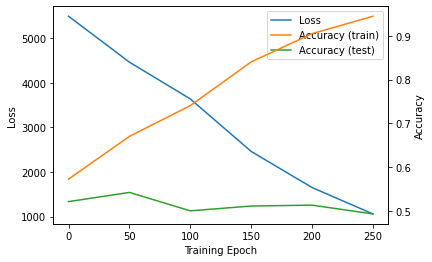

In [ ]:

Startingtime = time.time()
model = FeedforwardNeuralNetworkSGD([(50*50*3), 64, 32, 16, 6], 0.001 ,'none', 0, 0, 32, 0.9,['normal',1], 'sigmoid', 'cross-entropy')
model.fit(trainX,trainY, testX, testY, 300, 50)

#Ending Speed
Endingtime = time.time()

print('Time taken to complete : ', (Endingtime-Startingtime), 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")

testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))

In [ ]:
############################################################################################################################## 
#Normalizing 2

(valX, trainX, valY, trainY) = train_test_split(Img, Lab, test_size=0.85, random_state=1)
testX = Images
testY = Labels

trainX = trainX[:3000].reshape(trainX[:3000].shape[0], 50*50*3)
testX = testX[:1000].reshape(testX[:1000].shape[0], 50*50*3)
valX = valX[:1000].reshape(valX[:1000].shape[0], 50*50*3)
trainY = trainY[:3000].reshape(trainY[:3000].shape[0], 1)
testY = testY[:1000].reshape(testY[:1000].shape[0], 1)
valY = valY[:1000].reshape(valY[:1000].shape[0], 1)

df = pd.DataFrame(trainX)
trainX=((df-df.min())/(df.max()-df.min())).to_numpy()

df = pd.DataFrame(testX)
testX=((df-df.min())/(df.max()-df.min())).to_numpy()

df = pd.DataFrame(valX)
valX=((df-df.min())/(df.max()-df.min())).to_numpy()

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
print(valX.shape)
print(valY.shape)

(14034, 50, 50, 3)
(3000, 7500)
(3000, 1)
(1000, 7500)
(1000, 1)
(1000, 7500)
(1000, 1)


[INFO] epoch = 50, loss = 4492.133082, training accuracy = 0.660000, test accuracy = 0.453000
[INFO] epoch = 100, loss = 3216.217499, training accuracy = 0.781333, test accuracy = 0.463000
[INFO] epoch = 150, loss = 3957.771011, training accuracy = 0.710333, test accuracy = 0.445000
[INFO] epoch = 200, loss = 3296.999223, training accuracy = 0.763333, test accuracy = 0.440000
[INFO] epoch = 250, loss = 2948.681489, training accuracy = 0.787333, test accuracy = 0.442000
[INFO] epoch = 300, loss = 3641.036055, training accuracy = 0.740000, test accuracy = 0.453000
Time taken to complete :  557.2081120014191 seconds
Training set accuracy
0.74
Test set accuracy
0.453


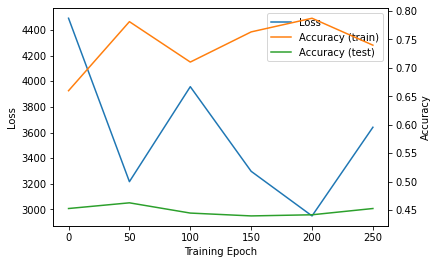

In [ ]:

Startingtime = time.time()
model = FeedforwardNeuralNetworkSGD([(50*50*3), 64, 32, 16, 6], 0.001 ,'none', 0, 0, 32, 0.9,['normal',1], 'sigmoid', 'cross-entropy')
model.fit(trainX,trainY, testX, testY, 300, 50)

#Ending Speed
Endingtime = time.time()

print('Time taken to complete : ', (Endingtime-Startingtime), 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")

testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))

From above we can see that normalize function produced better results and accuracy than min-max function. 

In [ ]:
############################################################################################################################## 
#Normalizing(Using normalize function)

(valX, trainX, valY, trainY) = train_test_split(Img, Lab, test_size=0.85, random_state=1)
testX = Images
testY = Labels

trainX = trainX[:3000].reshape(trainX[:3000].shape[0], 50*50*3)
testX = testX[:1000].reshape(testX[:1000].shape[0], 50*50*3)
valX = valX[:1000].reshape(valX[:1000].shape[0], 50*50*3)
trainY = trainY[:3000].reshape(trainY[:3000].shape[0], 1)
testY = testY[:1000].reshape(testY[:1000].shape[0], 1)
valY = valY[:1000].reshape(valY[:1000].shape[0], 1)

trainX = normalize(trainX)
testX = normalize(testX)
valX = normalize(valX)



(3000, 7500)
(3000, 1)
(1000, 7500)
(1000, 1)
(1000, 7500)
(1000, 1)


[INFO] epoch = 50, loss = 5545.472773, training accuracy = 0.570000, test accuracy = 0.510000
[INFO] epoch = 100, loss = 4554.864643, training accuracy = 0.665667, test accuracy = 0.530000
[INFO] epoch = 150, loss = 3904.958566, training accuracy = 0.721000, test accuracy = 0.525000
[INFO] epoch = 200, loss = 2760.959084, training accuracy = 0.810667, test accuracy = 0.544000
[INFO] epoch = 250, loss = 2154.792406, training accuracy = 0.862000, test accuracy = 0.525000
[INFO] epoch = 300, loss = 1141.011891, training accuracy = 0.941667, test accuracy = 0.541000
Time taken to complete :  548.4496510028839 seconds
Training set accuracy
0.9416666666666667
Test set accuracy
0.541


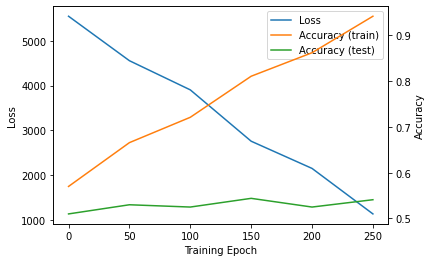

In [ ]:
##############################################################################################################################
#Testing for a good weight initialization method 

Startingtime = time.time()
model = FeedforwardNeuralNetworkSGD([(50*50*3), 64, 32, 16, 6], 0.001 ,'none', 0, 0, 32, 0.9,['normal',1], 'sigmoid', 'cross-entropy')
model.fit(trainX,trainY, testX, testY, 300, 50)

#Ending Speed
Endingtime = time.time()

print('Time taken to complete : ', (Endingtime-Startingtime), 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")

testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))

[INFO] epoch = 50, loss = 1049.665748, training accuracy = 0.437333, test accuracy = 0.429000
[INFO] epoch = 100, loss = 956.797748, training accuracy = 0.504667, test accuracy = 0.470000
[INFO] epoch = 150, loss = 898.818298, training accuracy = 0.542333, test accuracy = 0.499000
[INFO] epoch = 200, loss = 866.201619, training accuracy = 0.567000, test accuracy = 0.494000
[INFO] epoch = 250, loss = 830.236633, training accuracy = 0.596000, test accuracy = 0.513000
[INFO] epoch = 300, loss = 797.326315, training accuracy = 0.608000, test accuracy = 0.529000
Time taken to complete :  505.51177287101746 seconds
Training set accuracy
0.608
Test set accuracy
0.529


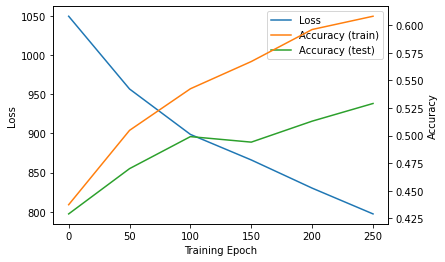

In [ ]:
Startingtime = time.time()
model = FeedforwardNeuralNetworkSGD([(50*50*3), 64, 32, 16, 6], 0.001 ,'none', 0, 0, 32, 0.9,['normal',1], 'sigmoid', 'sum-of-squares')
model.fit(trainX,trainY, testX, testY, 300, 50)

#Ending Speed
Endingtime = time.time()

print('Time taken to complete : ', (Endingtime-Startingtime), 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")

testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log


[INFO] epoch = 50, loss = 4543.146471, training accuracy = 0.677000, test accuracy = 0.532000
[INFO] epoch = 100, loss = 3120.466161, training accuracy = 0.757667, test accuracy = 0.503000
[INFO] epoch = 150, loss = 1694.064145, training accuracy = 0.896667, test accuracy = 0.528000
[INFO] epoch = 200, loss = 882.558173, training accuracy = 0.959333, test accuracy = 0.544000
[INFO] epoch = 250, loss = 724.852318, training accuracy = 0.961333, test accuracy = 0.510000
[INFO] epoch = 300, loss = 616.954843, training accuracy = 0.967333, test accuracy = 0.518000
Time taken to complete :  501.67109870910645 seconds
Training set accuracy
0.9673333333333334
Test set accuracy
0.518


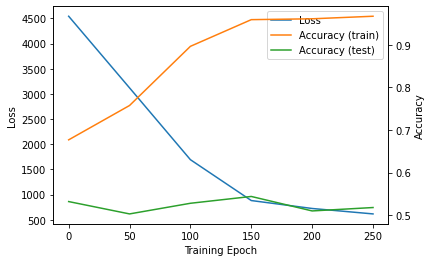

In [ ]:
Startingtime = time.time()
model = FeedforwardNeuralNetworkSGD([(50*50*3), 64, 32, 16, 6], 0.001 ,'none', 0, 0, 32, 0.9,['uniform', -0.1, 0.1], 'ELU', 'cross-entropy')
model.fit(trainX,trainY, testX, testY, 300, 50)

#Ending Speed
Endingtime = time.time()

print('Time taken to complete : ', (Endingtime-Startingtime), 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")

testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[INFO] epoch = 50, loss = inf, training accuracy = 0.817000, test accuracy = 0.526000
[INFO] epoch = 100, loss = inf, training accuracy = 0.883000, test accuracy = 0.516000
[INFO] epoch = 150, loss = inf, training accuracy = 0.920667, test accuracy = 0.491000
[INFO] epoch = 200, loss = inf, training accuracy = 0.983333, test accuracy = 0.502000
[INFO] epoch = 250, loss = inf, training accuracy = 0.993333, test accuracy = 0.512000
[INFO] epoch = 300, loss = 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000, training accuracy = 0.996000, test accuracy = 0.522000
Time taken to complete :  528.4729013442993 seconds
Training set accuracy
0.996
Test set accuracy
0.522


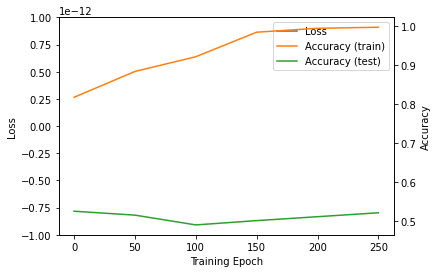

In [ ]:
Startingtime = time.time()
model = FeedforwardNeuralNetworkSGD([(50*50*3), 64, 32, 16, 6], 0.001 ,'none', 0, 0, 32, 0.9,['LeCun', 'normal'], 'ReLU', 'cross-entropy')
model.fit(trainX,trainY, testX, testY, 300, 50)

#Ending Speed
Endingtime = time.time()

print('Time taken to complete : ', (Endingtime-Startingtime), 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")

testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[INFO] epoch = 50, loss = inf, training accuracy = 0.757667, test accuracy = 0.512000
[INFO] epoch = 100, loss = inf, training accuracy = 0.851667, test accuracy = 0.501000
[INFO] epoch = 150, loss = inf, training accuracy = 0.923000, test accuracy = 0.526000
[INFO] epoch = 200, loss = inf, training accuracy = 0.970333, test accuracy = 0.494000
[INFO] epoch = 250, loss = inf, training accuracy = 0.985333, test accuracy = 0.490000
[INFO] epoch = 300, loss = inf, training accuracy = 0.989667, test accuracy = 0.513000
Time taken to complete :  693.6834616661072 seconds
Training set accuracy
0.9896666666666667
Test set accuracy
0.513


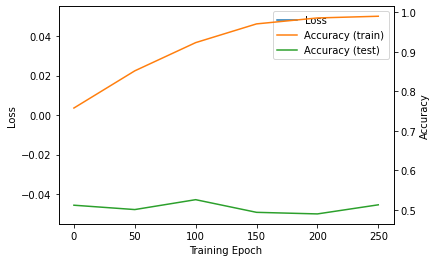

In [ ]:
Startingtime = time.time()
model = FeedforwardNeuralNetworkSGD([(50*50*3), 64, 32, 16, 6], 0.001 ,'none', 0, 0, 32, 0.9,['Glorot', 'normal'], 'ReLU', 'cross-entropy')
model.fit(trainX,trainY, testX, testY, 300, 50)

#Ending Speed
Endingtime = time.time()

print('Time taken to complete : ', (Endingtime-Startingtime), 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))


print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))

From this, we can see that: ['Glorot', 'normal'], 'ReLU', 'cross-entropy') gives the best training and test accuracy. Hence, shall be used to tune the hyperparameters.

Network Architecture:

To test the architecture, we can take in three different layers and substitute them to check for accuracy. We shall use the same weight initialization method used above and the same cose function and activation function from above.

In [ ]:
#Network Architecture 1 = [(50*50*3), 62, 62, 6] ## One input, Two hidden layers, one output
#Network Architecture 2 = [(50*50*3), 64, 32, 18, 6] ## one input, three hidden layer, one output
#Network Architecture 3 = [(50*50*3), 64, 32, 42, 52, 6]## one input, four hidden layer, one output

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[INFO] epoch = 50, loss = inf, training accuracy = 0.801333, test accuracy = 0.537000
[INFO] epoch = 100, loss = inf, training accuracy = 0.932000, test accuracy = 0.515000
[INFO] epoch = 150, loss = inf, training accuracy = 0.981667, test accuracy = 0.517000
[INFO] epoch = 200, loss = 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000, training accuracy = 0.998000, test accuracy = 0.507000
[INFO] epoch = 250, loss = 120.128474, training accuracy = 0.998333, test accuracy = 0.499000
[INFO] epoch = 300, loss = 144.494485, training accuracy = 0.998667, test accuracy = 0.502000
Training set accuracy:


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:2450: RuntimeWarning: overflow encountered in double_scalars
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


0.9986666666666667
Test set accuracy:
0.502


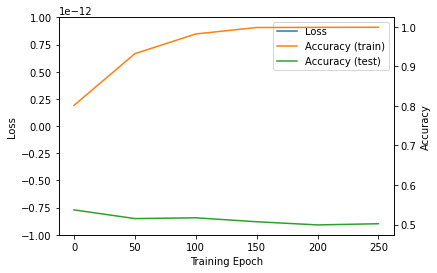

In [ ]:
############################## Network Architecture 1 ################################################################################

model = FeedforwardNeuralNetworkSGD([(50*50*3), 64, 62, 6], 0.001 ,'none', 0, 0, 32, 0.9,['Glorot', 'normal'], 'ReLU', 'cross-entropy')
model.fit(trainX,trainY, testX, testY, 300, 50)


print("Training set accuracy:")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy:")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[INFO] epoch = 50, loss = inf, training accuracy = 0.789333, test accuracy = 0.564000
[INFO] epoch = 100, loss = inf, training accuracy = 0.846667, test accuracy = 0.522000
[INFO] epoch = 150, loss = inf, training accuracy = 0.901000, test accuracy = 0.501000
[INFO] epoch = 200, loss = inf, training accuracy = 0.957333, test accuracy = 0.507000
[INFO] epoch = 250, loss = inf, training accuracy = 0.982000, test accuracy = 0.520000
[INFO] epoch = 300, loss = inf, training accuracy = 0.991000, test accuracy = 0.519000
Training set accuracy:
0.991
Test set accuracy:
0.519


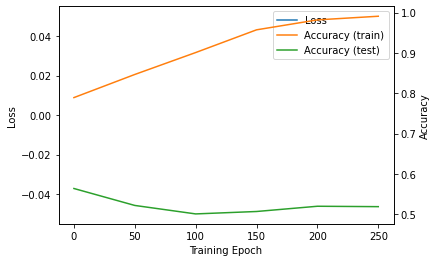

In [ ]:
############################## Network Architecture 2 ################################################################################

model = FeedforwardNeuralNetworkSGD([(50*50*3), 64, 32, 18, 6], 0.001 ,'none', 0, 0, 32, 0.9,['Glorot', 'normal'], 'ReLU', 'cross-entropy')
model.fit(trainX,trainY, testX, testY, 300, 50)


print("Training set accuracy:")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy:")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[INFO] epoch = 50, loss = inf, training accuracy = 0.742000, test accuracy = 0.540000
[INFO] epoch = 100, loss = inf, training accuracy = 0.784667, test accuracy = 0.517000
[INFO] epoch = 150, loss = inf, training accuracy = 0.827333, test accuracy = 0.502000
[INFO] epoch = 200, loss = inf, training accuracy = 0.936000, test accuracy = 0.519000
[INFO] epoch = 250, loss = inf, training accuracy = 0.983333, test accuracy = 0.524000
[INFO] epoch = 300, loss = 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000, training accuracy = 0.988333, test accuracy = 0.522000
Training set accuracy:
0.9883333333333333
Test set accuracy:
0.522


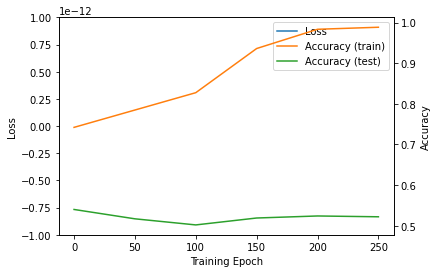

In [ ]:
############################## Network Architecture 3 ################################################################################

model = FeedforwardNeuralNetworkSGD([(50*50*3), 64, 32, 42, 52, 6], 0.001 ,'none', 0, 0, 32, 0.9,['Glorot', 'normal'], 'ReLU', 'cross-entropy')
model.fit(trainX,trainY, testX, testY, 300, 50)


print("Training set accuracy:")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy:")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))

From above, we can see that layer 3 shows better accuracy than the others. Now, using the layer3, we tune the hyper parameters.

In [ ]:
##############################################################################################################################  
# Tune the hyperparameters
## Print the values of alpha
alp_1= [1e-2, 1e-3 , 1e-4 , 1e-5]
## Print the values of lambda
lambda1 = [1e-1 , 1e-2 , 1e-3 , 0 , 1]
lambda2 = [1e-1 , 1e-2 , 1e-3 , 0 , 1]
#Print the value of decay rate
gamma = [1e-1 , 1e-2 , 1e-3 , 0, 0.9 ]

alpha: 0.01
[INFO] epoch = 50, loss = 8109.236081, training accuracy = 0.187000, test accuracy = 0.186000
[INFO] epoch = 100, loss = 8105.683876, training accuracy = 0.187000, test accuracy = 0.186000
[INFO] epoch = 150, loss = 8109.715894, training accuracy = 0.187000, test accuracy = 0.186000
[INFO] epoch = 200, loss = 8103.105223, training accuracy = 0.187000, test accuracy = 0.186000
[INFO] epoch = 250, loss = 8102.943829, training accuracy = 0.187000, test accuracy = 0.186000
[INFO] epoch = 300, loss = 8104.420723, training accuracy = 0.187000, test accuracy = 0.186000
Training set accuracy:
0.187
Test set accuracy:
0.186
alpha: 0.001


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[INFO] epoch = 50, loss = inf, training accuracy = 0.699000, test accuracy = 0.519000
[INFO] epoch = 100, loss = inf, training accuracy = 0.815000, test accuracy = 0.500000
[INFO] epoch = 150, loss = inf, training accuracy = 0.846333, test accuracy = 0.512000
[INFO] epoch = 200, loss = inf, training accuracy = 0.956000, test accuracy = 0.525000
[INFO] epoch = 250, loss = inf, training accuracy = 0.976000, test accuracy = 0.521000
[INFO] epoch = 300, loss = inf, training accuracy = 0.988667, test accuracy = 0.523000
Training set accuracy:
0.9886666666666667
Test set accuracy:
0.523
alpha: 0.0001


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[INFO] epoch = 50, loss = inf, training accuracy = 0.564333, test accuracy = 0.515000
[INFO] epoch = 100, loss = inf, training accuracy = 0.718000, test accuracy = 0.550000
[INFO] epoch = 150, loss = inf, training accuracy = 0.830667, test accuracy = 0.520000
[INFO] epoch = 200, loss = inf, training accuracy = 0.742000, test accuracy = 0.427000
[INFO] epoch = 250, loss = inf, training accuracy = 0.951333, test accuracy = 0.504000
[INFO] epoch = 300, loss = inf, training accuracy = 0.978333, test accuracy = 0.496000
Training set accuracy:
0.9783333333333334
Test set accuracy:
0.496
alpha: 1e-05


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in multiply


[INFO] epoch = 50, loss = 7751.057207, training accuracy = 0.331333, test accuracy = 0.320000


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[INFO] epoch = 100, loss = inf, training accuracy = 0.363667, test accuracy = 0.350000
[INFO] epoch = 150, loss = inf, training accuracy = 0.410333, test accuracy = 0.398000
[INFO] epoch = 200, loss = inf, training accuracy = 0.442667, test accuracy = 0.431000
[INFO] epoch = 250, loss = inf, training accuracy = 0.478000, test accuracy = 0.446000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log


[INFO] epoch = 300, loss = inf, training accuracy = 0.512000, test accuracy = 0.469000
Training set accuracy:
0.512
Test set accuracy:
0.469


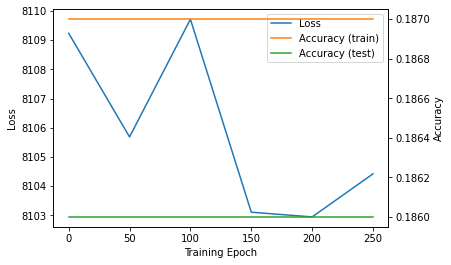

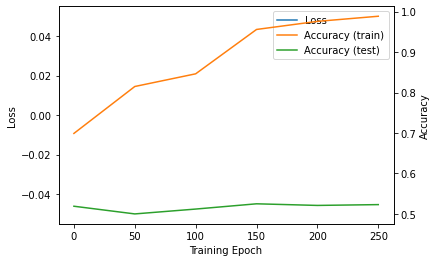

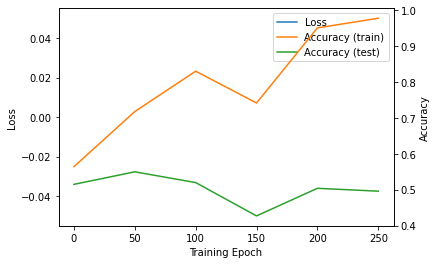

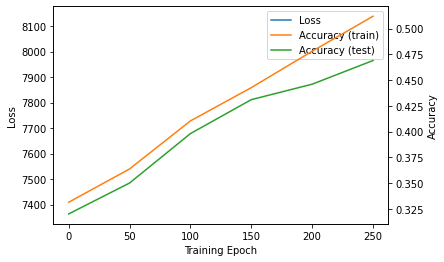

In [ ]:
for alpha in alp_1:
    print('alpha:',alpha)

    model = FeedforwardNeuralNetworkSGD([(50*50*3), 64, 32, 42, 52, 6], alpha ,'none', 0, 0, 32, 0.9,['Glorot', 'normal'], 'ReLU', 'cross-entropy')
    model.fit(trainX,trainY, testX, testY, 300, 50)


    print("Training set accuracy:")
    trainY = LabelBinarizer().fit_transform(trainY)
    predictedY = model.predict(trainX)
    predictedY = predictedY.argmax(axis=1)
    trainY = trainY.argmax(axis=1)
    print(accuracy_score(trainY, predictedY))

    print("Test set accuracy:")
    testY = LabelBinarizer().fit_transform(testY)
    predictedY = model.predict(testX)
    predictedY = predictedY.argmax(axis=1)
    testY = testY.argmax(axis=1)
    print(accuracy_score(testY, predictedY))

From above, it is evident that the optimal value for alpha is 0.001. We could take 0.001 but the graph will take time to converge. Using that alpha value, we predict the optimum value of lambda1.

lambd: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[INFO] epoch = 50, loss = inf, training accuracy = 0.781333, test accuracy = 0.547000
[INFO] epoch = 100, loss = inf, training accuracy = 0.824667, test accuracy = 0.503000
[INFO] epoch = 150, loss = inf, training accuracy = 0.911333, test accuracy = 0.521000
[INFO] epoch = 200, loss = inf, training accuracy = 0.965667, test accuracy = 0.533000
[INFO] epoch = 250, loss = inf, training accuracy = 0.980333, test accuracy = 0.540000
[INFO] epoch = 300, loss = inf, training accuracy = 0.983667, test accuracy = 0.547000
Training set accuracy:
0.9836666666666667
Test set accuracy:
0.547
lambd: 0.01


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[INFO] epoch = 50, loss = inf, training accuracy = 0.762333, test accuracy = 0.541000
[INFO] epoch = 100, loss = inf, training accuracy = 0.892667, test accuracy = 0.545000
[INFO] epoch = 150, loss = inf, training accuracy = 0.939000, test accuracy = 0.531000
[INFO] epoch = 200, loss = inf, training accuracy = 0.966000, test accuracy = 0.524000
[INFO] epoch = 250, loss = inf, training accuracy = 0.963000, test accuracy = 0.507000
[INFO] epoch = 300, loss = 230.213790, training accuracy = 0.989667, test accuracy = 0.514000
Training set accuracy:
0.9896666666666667
Test set accuracy:
0.514
lambd: 0.001


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[INFO] epoch = 50, loss = inf, training accuracy = 0.723667, test accuracy = 0.524000
[INFO] epoch = 100, loss = inf, training accuracy = 0.869667, test accuracy = 0.524000
[INFO] epoch = 150, loss = inf, training accuracy = 0.835667, test accuracy = 0.480000
[INFO] epoch = 200, loss = inf, training accuracy = 0.961000, test accuracy = 0.546000
[INFO] epoch = 250, loss = 388.629472, training accuracy = 0.975333, test accuracy = 0.548000
[INFO] epoch = 300, loss = inf, training accuracy = 0.976000, test accuracy = 0.534000
Training set accuracy:
0.976
Test set accuracy:
0.534
lambd: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[INFO] epoch = 50, loss = inf, training accuracy = 0.721000, test accuracy = 0.530000
[INFO] epoch = 100, loss = inf, training accuracy = 0.832000, test accuracy = 0.512000
[INFO] epoch = 150, loss = inf, training accuracy = 0.906333, test accuracy = 0.524000
[INFO] epoch = 200, loss = inf, training accuracy = 0.904333, test accuracy = 0.509000
[INFO] epoch = 250, loss = inf, training accuracy = 0.977333, test accuracy = 0.522000
[INFO] epoch = 300, loss = 223.516271, training accuracy = 0.991000, test accuracy = 0.513000
Training set accuracy:
0.991
Test set accuracy:
0.513
lambd: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[INFO] epoch = 50, loss = inf, training accuracy = 0.673000, test accuracy = 0.508000
[INFO] epoch = 100, loss = inf, training accuracy = 0.769667, test accuracy = 0.534000
[INFO] epoch = 150, loss = inf, training accuracy = 0.817333, test accuracy = 0.514000
[INFO] epoch = 200, loss = inf, training accuracy = 0.920000, test accuracy = 0.550000
[INFO] epoch = 250, loss = inf, training accuracy = 0.830333, test accuracy = 0.510000
[INFO] epoch = 300, loss = inf, training accuracy = 0.910333, test accuracy = 0.529000
Training set accuracy:
0.9103333333333333
Test set accuracy:
0.529


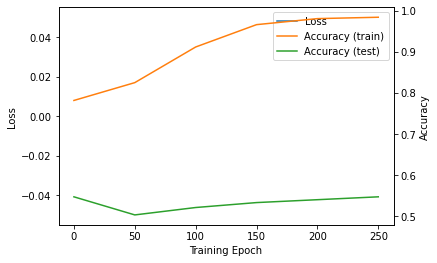

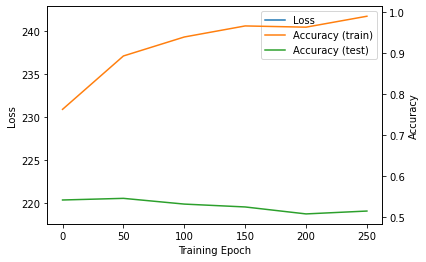

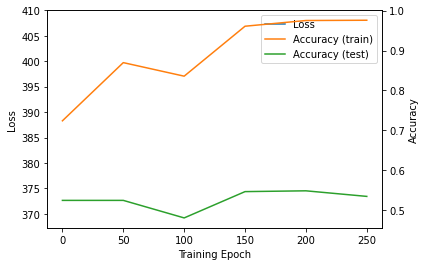

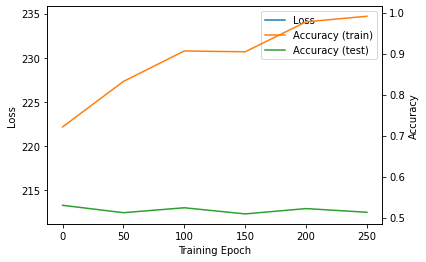

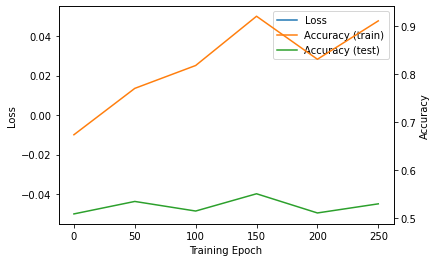

In [ ]:
for lambd in lambda1:
    print('lambd:',lambd)

    model = FeedforwardNeuralNetworkSGD([(50*50*3), 64, 32, 42, 52, 6], 0.001 ,'none', lambd, 0, 32, 0.9,['Glorot', 'normal'], 'ReLU', 'cross-entropy')
    model.fit(trainX,trainY, testX, testY, 300, 50)


    print("Training set accuracy:")
    trainY = LabelBinarizer().fit_transform(trainY)
    predictedY = model.predict(trainX)
    predictedY = predictedY.argmax(axis=1)
    trainY = trainY.argmax(axis=1)
    print(accuracy_score(trainY, predictedY))

    print("Test set accuracy:")
    testY = LabelBinarizer().fit_transform(testY)
    predictedY = model.predict(testX)
    predictedY = predictedY.argmax(axis=1)
    testY = testY.argmax(axis=1)
    print(accuracy_score(testY, predictedY))

We can see that lambda 1 value = 0.1. Using this value, we calculate lambda2.

lambd2: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[INFO] epoch = 50, loss = inf, training accuracy = 0.653667, test accuracy = 0.471000
[INFO] epoch = 100, loss = inf, training accuracy = 0.893667, test accuracy = 0.536000
[INFO] epoch = 150, loss = inf, training accuracy = 0.938667, test accuracy = 0.508000
[INFO] epoch = 200, loss = inf, training accuracy = 0.967000, test accuracy = 0.526000
[INFO] epoch = 250, loss = inf, training accuracy = 0.975000, test accuracy = 0.518000
[INFO] epoch = 300, loss = inf, training accuracy = 0.975667, test accuracy = 0.500000
Training set accuracy:
0.9756666666666667
Test set accuracy:
0.5
lambd2: 0.01


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[INFO] epoch = 50, loss = inf, training accuracy = 0.785000, test accuracy = 0.557000
[INFO] epoch = 100, loss = inf, training accuracy = 0.823000, test accuracy = 0.510000
[INFO] epoch = 150, loss = inf, training accuracy = 0.917333, test accuracy = 0.536000
[INFO] epoch = 200, loss = inf, training accuracy = 0.961667, test accuracy = 0.538000
[INFO] epoch = 250, loss = inf, training accuracy = 0.962000, test accuracy = 0.544000
[INFO] epoch = 300, loss = inf, training accuracy = 0.978000, test accuracy = 0.547000
Training set accuracy:
0.978
Test set accuracy:
0.547
lambd2: 0.001


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[INFO] epoch = 50, loss = inf, training accuracy = 0.744333, test accuracy = 0.521000
[INFO] epoch = 100, loss = inf, training accuracy = 0.790000, test accuracy = 0.504000
[INFO] epoch = 150, loss = inf, training accuracy = 0.871333, test accuracy = 0.510000
[INFO] epoch = 200, loss = inf, training accuracy = 0.937333, test accuracy = 0.498000
[INFO] epoch = 250, loss = inf, training accuracy = 0.986000, test accuracy = 0.525000
[INFO] epoch = 300, loss = inf, training accuracy = 0.989000, test accuracy = 0.528000
Training set accuracy:
0.989
Test set accuracy:
0.528
lambd2: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[INFO] epoch = 50, loss = inf, training accuracy = 0.748000, test accuracy = 0.541000
[INFO] epoch = 100, loss = inf, training accuracy = 0.831667, test accuracy = 0.527000
[INFO] epoch = 150, loss = inf, training accuracy = 0.942667, test accuracy = 0.544000
[INFO] epoch = 200, loss = inf, training accuracy = 0.972667, test accuracy = 0.542000
[INFO] epoch = 250, loss = inf, training accuracy = 0.971000, test accuracy = 0.538000
[INFO] epoch = 300, loss = inf, training accuracy = 0.974333, test accuracy = 0.521000
Training set accuracy:
0.9743333333333334
Test set accuracy:
0.521
lambd2: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[INFO] epoch = 50, loss = inf, training accuracy = 0.746000, test accuracy = 0.555000
[INFO] epoch = 100, loss = inf, training accuracy = 0.885000, test accuracy = 0.562000
[INFO] epoch = 150, loss = inf, training accuracy = 0.936667, test accuracy = 0.548000
[INFO] epoch = 200, loss = inf, training accuracy = 0.852333, test accuracy = 0.526000
[INFO] epoch = 250, loss = inf, training accuracy = 0.924333, test accuracy = 0.537000
[INFO] epoch = 300, loss = inf, training accuracy = 0.867000, test accuracy = 0.474000
Training set accuracy:
0.867
Test set accuracy:
0.474


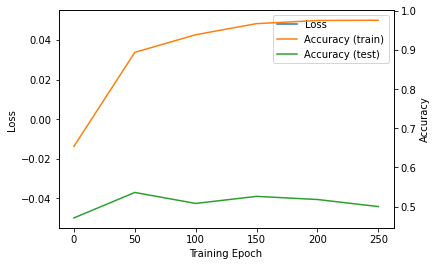

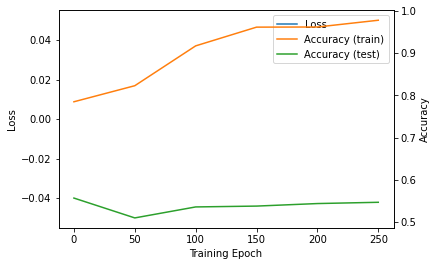

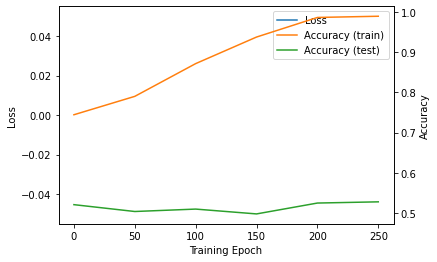

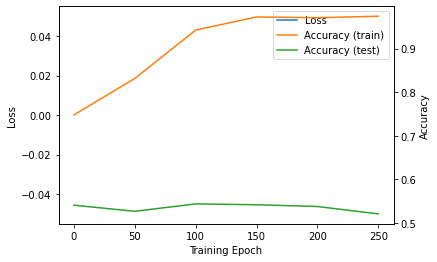

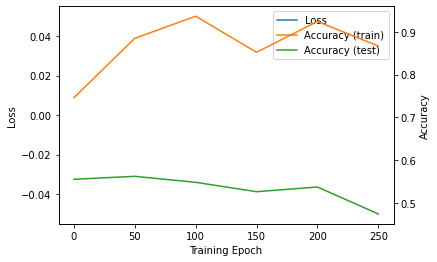

In [ ]:
for lambd2 in lambda2:
    print('lambd2:',lambd2)

    model = FeedforwardNeuralNetworkSGD([(50*50*3), 64, 32, 42, 52, 6], 0.001 ,'none', 0.1, lambd2, 32, 0.9,['Glorot', 'normal'], 'ReLU', 'cross-entropy')
    model.fit(trainX,trainY, testX, testY, 300, 50)


    print("Training set accuracy:")
    trainY = LabelBinarizer().fit_transform(trainY)
    predictedY = model.predict(trainX)
    predictedY = predictedY.argmax(axis=1)
    trainY = trainY.argmax(axis=1)
    print(accuracy_score(trainY, predictedY))

    print("Test set accuracy:")
    testY = LabelBinarizer().fit_transform(testY)
    predictedY = model.predict(testX)
    predictedY = predictedY.argmax(axis=1)
    testY = testY.argmax(axis=1)
    print(accuracy_score(testY, predictedY))

We can see that lambsa 2 value = 0.01. Using this value, we calculate the decay rate( gamma).

gam: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[INFO] epoch = 50, loss = inf, training accuracy = 0.528000, test accuracy = 0.492000
[INFO] epoch = 100, loss = inf, training accuracy = 0.620000, test accuracy = 0.523000
[INFO] epoch = 150, loss = inf, training accuracy = 0.714667, test accuracy = 0.539000
[INFO] epoch = 200, loss = inf, training accuracy = 0.486333, test accuracy = 0.373000
[INFO] epoch = 250, loss = inf, training accuracy = 0.862000, test accuracy = 0.537000
[INFO] epoch = 300, loss = inf, training accuracy = 0.939333, test accuracy = 0.545000
Training set accuracy:
0.9393333333333334
Test set accuracy:
0.545
gam: 0.01


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[INFO] epoch = 50, loss = inf, training accuracy = 0.545333, test accuracy = 0.500000
[INFO] epoch = 100, loss = inf, training accuracy = 0.655667, test accuracy = 0.505000
[INFO] epoch = 150, loss = inf, training accuracy = 0.719667, test accuracy = 0.534000
[INFO] epoch = 200, loss = inf, training accuracy = 0.841000, test accuracy = 0.550000
[INFO] epoch = 250, loss = inf, training accuracy = 0.904333, test accuracy = 0.555000
[INFO] epoch = 300, loss = inf, training accuracy = 0.926667, test accuracy = 0.535000
Training set accuracy:
0.9266666666666666
Test set accuracy:
0.535
gam: 0.001


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[INFO] epoch = 50, loss = inf, training accuracy = 0.554333, test accuracy = 0.501000
[INFO] epoch = 100, loss = inf, training accuracy = 0.655667, test accuracy = 0.530000
[INFO] epoch = 150, loss = inf, training accuracy = 0.750667, test accuracy = 0.513000
[INFO] epoch = 200, loss = inf, training accuracy = 0.862667, test accuracy = 0.559000
[INFO] epoch = 250, loss = inf, training accuracy = 0.910000, test accuracy = 0.542000
[INFO] epoch = 300, loss = inf, training accuracy = 0.921333, test accuracy = 0.529000
Training set accuracy:
0.9213333333333333
Test set accuracy:
0.529
gam: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[INFO] epoch = 50, loss = inf, training accuracy = 0.554000, test accuracy = 0.514000
[INFO] epoch = 100, loss = inf, training accuracy = 0.686000, test accuracy = 0.546000
[INFO] epoch = 150, loss = inf, training accuracy = 0.759333, test accuracy = 0.535000
[INFO] epoch = 200, loss = inf, training accuracy = 0.831000, test accuracy = 0.535000
[INFO] epoch = 250, loss = inf, training accuracy = 0.900333, test accuracy = 0.545000
[INFO] epoch = 300, loss = inf, training accuracy = 0.941667, test accuracy = 0.547000
Training set accuracy:
0.9416666666666667
Test set accuracy:
0.547
gam: 0.9


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[INFO] epoch = 50, loss = inf, training accuracy = 0.713000, test accuracy = 0.537000
[INFO] epoch = 100, loss = inf, training accuracy = 0.859333, test accuracy = 0.533000
[INFO] epoch = 150, loss = inf, training accuracy = 0.902667, test accuracy = 0.531000
[INFO] epoch = 200, loss = inf, training accuracy = 0.943000, test accuracy = 0.516000
[INFO] epoch = 250, loss = inf, training accuracy = 0.947000, test accuracy = 0.527000
[INFO] epoch = 300, loss = inf, training accuracy = 0.963000, test accuracy = 0.510000
Training set accuracy:
0.963
Test set accuracy:
0.51


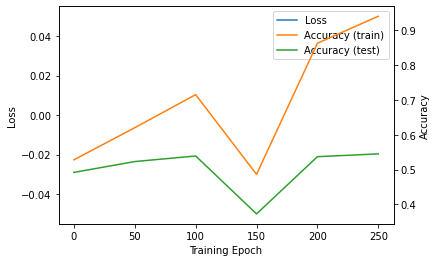

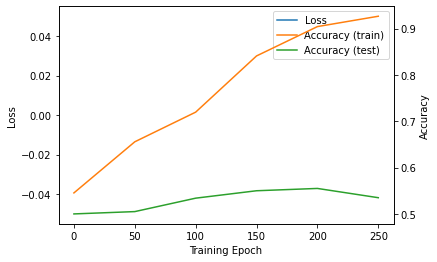

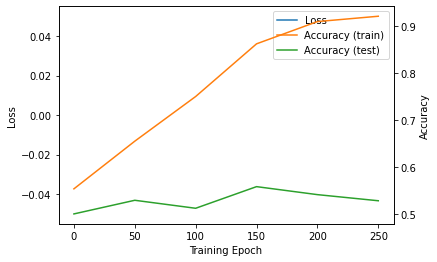

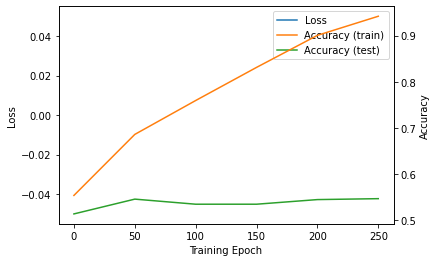

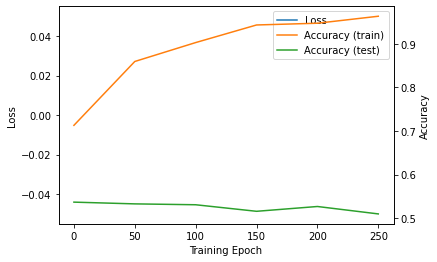

In [ ]:
for gam in gamma:
    print('gam:',gam)

    model = FeedforwardNeuralNetworkSGD([(50*50*3), 64, 32, 42, 52, 6], 0.001 ,'none', 0.1, 0.01, 32, gam,['Glorot', 'normal'], 'ReLU', 'cross-entropy')
    model.fit(trainX,trainY, testX, testY, 300, 50)


    print("Training set accuracy:")
    trainY = LabelBinarizer().fit_transform(trainY)
    predictedY = model.predict(trainX)
    predictedY = predictedY.argmax(axis=1)
    trainY = trainY.argmax(axis=1)
    print(accuracy_score(trainY, predictedY))

    print("Test set accuracy:")
    testY = LabelBinarizer().fit_transform(testY)
    predictedY = model.predict(testX)
    predictedY = predictedY.argmax(axis=1)
    testY = testY.argmax(axis=1)
    print(accuracy_score(testY, predictedY))

The optimum value of gamma is 0. Now we use the lambda1, lambda2 and gamma values in our final code to test accuracy.

Now, to check the accuracy of my final model, I will be taking the following dataset. 

In [ ]:
(valX, trainX, valY, trainY) = train_test_split(Img, Lab, test_size=0.85, random_state=1)
testX = Images
testY = Labels

trainX = trainX[:8000].reshape(trainX[:8000].shape[0], 50*50*3)
testX = testX[:3000].reshape(testX[:3000].shape[0], 50*50*3)
valX = valX.reshape(valX.shape[0], 50*50*3)
trainY = trainY[:8000].reshape(trainY[:8000].shape[0], 1)
testY = testY[:3000].reshape(testY[:3000].shape[0], 1)
valY = valY.reshape(valY.shape[0], 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[INFO] epoch = 10, loss = inf, training accuracy = 0.455750, test accuracy = 0.440667


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:293: RuntimeWarning: invalid value encountered in log


[INFO] epoch = 20, loss = inf, training accuracy = 0.501875, test accuracy = 0.482000
[INFO] epoch = 30, loss = inf, training accuracy = 0.550875, test accuracy = 0.522333
[INFO] epoch = 40, loss = inf, training accuracy = 0.608875, test accuracy = 0.540333
[INFO] epoch = 50, loss = inf, training accuracy = 0.632250, test accuracy = 0.556333
[INFO] epoch = 60, loss = inf, training accuracy = 0.669250, test accuracy = 0.573667
[INFO] epoch = 70, loss = inf, training accuracy = 0.631000, test accuracy = 0.530000
[INFO] epoch = 80, loss = inf, training accuracy = 0.722250, test accuracy = 0.584000
[INFO] epoch = 90, loss = inf, training accuracy = 0.692250, test accuracy = 0.553333
[INFO] epoch = 100, loss = inf, training accuracy = 0.763250, test accuracy = 0.578000
Training set accuracy:
0.76325
Test set accuracy:
0.578
Validation set accuracy:
0.5919239904988124


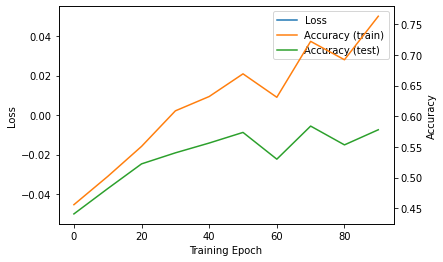

In [ ]:
#######################################################################################################################################
#Testing the final code with all the parameters.

model = FeedforwardNeuralNetworkSGD([(50*50*3), 64, 32, 42, 52, 6], 0.001 ,'none', 0.1, 0.01, 32, 0,['Glorot', 'normal'], 'ReLU', 'cross-entropy')
model.fit(trainX,trainY, testX, testY, 100, 10)

print("Training set accuracy:")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy:")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))

print("Validation set accuracy:")

valY= LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))